## EDA

Goals: 
- Identify patterns and develop hypotheses.
- Test technical assumptions. Inform model selection and feature engineering.
- Build an intuition for the data.

In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler

In [25]:
data = pd.read_csv('new data/merged.csv')
data.describe()

,Year,Bovine Price,Poultry Price,Pig Price,Pop,Bovine Production,Pig Production,Poultry Production,Emissions
count,812.000000,812.000000,812.000000,812.000000,8.120000e+02,812.000000,812.000000,812.000000,812.000000
mean,2005.259852,3452.051108,1864.547291,2121.886576,8.051857e+04,998.020936,1893.912562,1535.353448,69463.199802
std,7.346470,2990.186445,832.982955,1047.600346,1.996776e+05,2056.323622,6707.900502,3502.581740,123378.354154
min,1991.000000,459.100000,547.900000,206.000000,7.011453e+03,11.000000,0.000000,2.000000,2662.081200
25%,2000.000000,1963.750000,1315.750000,1438.325000,1.437839e+04,109.000000,107.750000,168.750000,11454.572875
50%,2006.000000,2836.100000,1686.150000,1931.150000,2.982382e+04,328.500000,347.500000,607.500000,28611.431950
75%,2011.000000,3999.475000,2181.725000,2535.775000,6.521307e+04,844.750000,1264.250000,1230.500000,71988.475450
max,2018.000000,26250.600000,5809.500000,8600.600000,1.414049e+06,12427.000000,56714.000000,21017.000000,700933.535400


In [26]:
data.Pop = data.Pop/1000
data.describe()

,Year,Bovine Price,Poultry Price,Pig Price,Pop,Bovine Production,Pig Production,Poultry Production,Emissions
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,2005.259852,3452.051108,1864.547291,2121.886576,80.518573,998.020936,1893.912562,1535.353448,69463.199802
std,7.346470,2990.186445,832.982955,1047.600346,199.677599,2056.323622,6707.900502,3502.581740,123378.354154
min,1991.000000,459.100000,547.900000,206.000000,7.011453,11.000000,0.000000,2.000000,2662.081200
25%,2000.000000,1963.750000,1315.750000,1438.325000,14.378386,109.000000,107.750000,168.750000,11454.572875
50%,2006.000000,2836.100000,1686.150000,1931.150000,29.823822,328.500000,347.500000,607.500000,28611.431950
75%,2011.000000,3999.475000,2181.725000,2535.775000,65.213072,844.750000,1264.250000,1230.500000,71988.475450
max,2018.000000,26250.600000,5809.500000,8600.600000,1414.049351,12427.000000,56714.000000,21017.000000,700933.535400


## Skewed data
We can see there's a lot of variation in the maximum and 75th percentile for much of our data. Let's unspect the populations and meat production values to understand if this is being caused by one cuntry.

In [27]:
data.groupby(by='Area').agg({'Pop':np.max}).sort_values('Pop',ascending=False)[:8]

,Pop
Area,
"China, mainland",1414.049351
United States of America,320.878310
Indonesia,258.383256
Brazil,206.163053
Russian Federation,148.373580
Nigeria,146.339977
Japan,128.555189
Mexico,126.190788


### Production Means

In [28]:
#By country
country_production_means = data.groupby('Area')[['Bovine Production','Poultry Production','Pig Production']].mean().sort_values('Bovine Production',ascending=False)
country_production_means[:10]

,Bovine Production,Poultry Production,Pig Production
Area,,,
United States of America,11809.125000,18874.000000,9849.125000
Brazil,8906.000000,11075.600000,3197.100000
"China, mainland",5820.111111,14737.055556,44489.111111
Argentina,2922.000000,1528.000000,286.090909
Australia,2057.200000,745.560000,359.680000
Russian Federation,2043.074074,2023.148148,2203.370370
France,1581.214286,1898.750000,2178.750000
Mexico,1575.107143,2205.250000,1101.142857
Germany,1438.500000,1063.875000,4585.500000


In [29]:
#By year
year_production_means = data.groupby('Year')[['Bovine Production','Poultry Production','Pig Production']].mean().sort_values('Year',ascending=False)
year_production_means[:10]

,Bovine Production,Poultry Production,Pig Production
Year,,,
2018,694.000000,1305.923077,1774.615385
2017,686.307692,1525.307692,1823.461538
2016,1389.944444,2872.611111,4529.666667
2015,1205.567568,2385.135135,2862.702703
2014,1210.102564,2223.564103,2462.641026
2013,1244.578947,2210.736842,2426.552632
2012,1253.891892,2210.297297,2443.135135
2011,1268.388889,2201.805556,2420.194444
2010,1022.947368,1776.526316,2247.131579


### Price Means

In [30]:
#By country
country_price_means = data.groupby('Area')[['Bovine Price','Poultry Price','Pig Price']].mean().sort_values('Bovine Price',ascending=False)
country_price_means[:10]

,Bovine Price,Poultry Price,Pig Price
Area,,,
Japan,22245.115385,2635.092308,4489.276923
Republic of Korea,12840.928571,2050.914286,3295.371429
Portugal,6571.545455,1011.727273,2119.409091
Belgium,6005.212500,1499.300000,1746.462500
Indonesia,5765.753846,3091.238462,2584.846154
Italy,5282.150000,1928.800000,2947.950000
Netherlands,5111.107692,1316.715385,1839.553846
United Kingdom of Great Britain and Northern Ireland,4914.457143,1499.114286,2100.014286
Malaysia,4786.482609,1751.978261,2466.878261


In [31]:
#By year
year_price_means = data.groupby('Year')[['Bovine Price','Poultry Price','Pig Price']].mean().sort_values('Year',ascending=False)
year_price_means[:10]

,Bovine Price,Poultry Price,Pig Price
Year,,,
2018,3731.292308,2030.300000,2278.292308
2017,4074.415385,1843.061538,2126.400000
2016,3872.166667,2134.638889,2151.788889
2015,4342.727027,2089.037838,2251.783784
2014,4829.351282,2534.728205,2864.625641
2013,4734.210526,2621.894737,2692.360526
2012,4673.891892,2445.183784,2731.678378
2011,4479.813889,2353.116667,2634.211111
2010,4268.744737,2181.963158,2356.513158


## Visualizing YoY and per Country Price and Production
We will look at the distribution of avg meat price and production, first year over year then country by country. The questions we are looking to answer are:
- Are prices/production values distributed evenly across countries?
- Are there patterns with how price/prod changes over time?
- Is there a consistent relationship and correlation between price and prod?

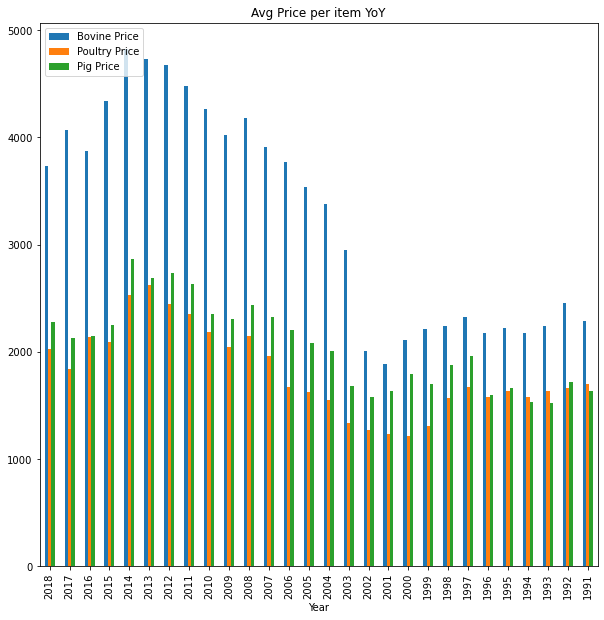

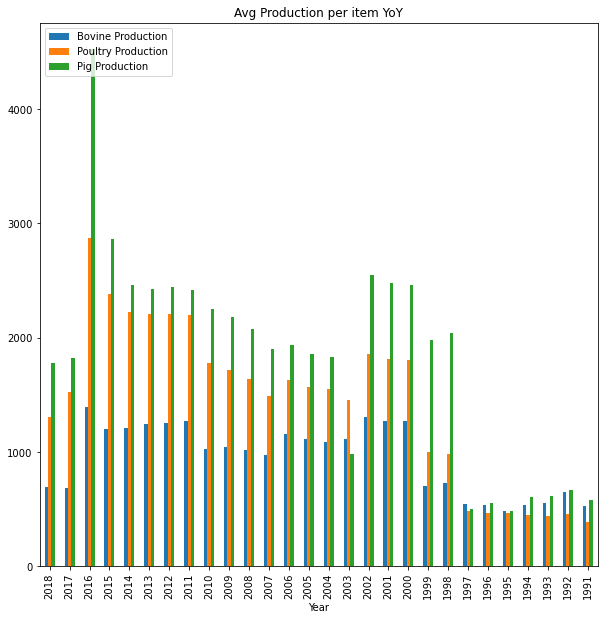

In [32]:
_=(year_price_means.reindex(index=year_price_means.mean(axis=1)
    .index)
    .plot(kind='bar', figsize=(10, 10), title='Avg Price per item YoY'))
_=plt.legend(loc='upper left')

_=(year_production_means.reindex(index=year_production_means.mean(axis=1)
    .index)
    .plot(kind='bar', figsize=(10, 10), title='Avg Production per item YoY'))
_=plt.legend(loc='upper left')

### Visualizing Price and Production by country

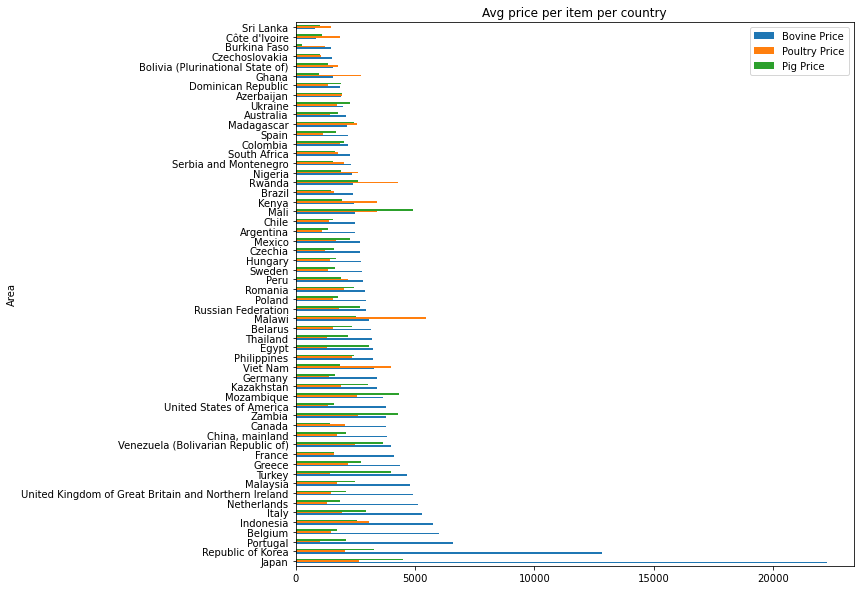

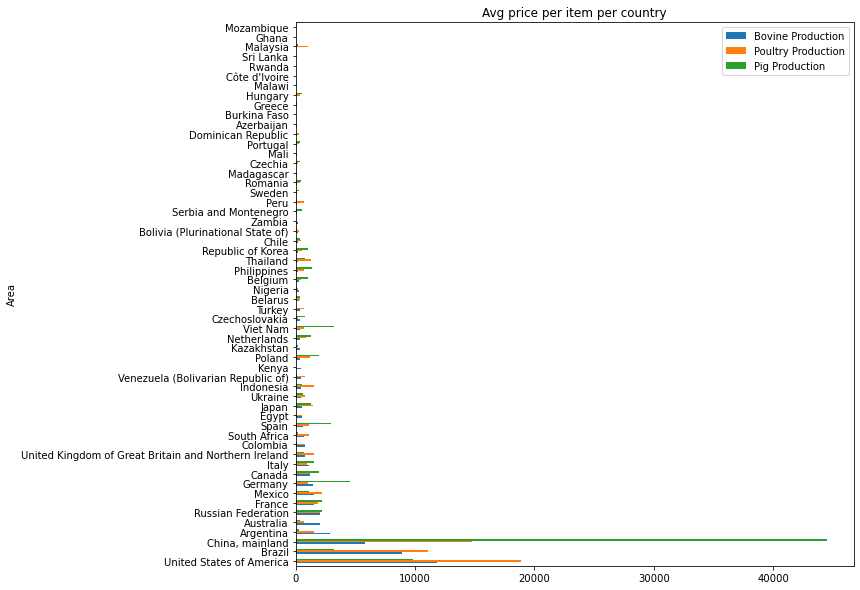

In [33]:
_=(country_price_means.reindex(index=country_price_means.mean(axis=1)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Avg price per item per country'))
_=plt.legend(loc='upper right')

_=(country_production_means.reindex(index=country_production_means.mean(axis=1)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Avg price per item per country'))
_=plt.legend(loc='upper right')

## Inpsecting Relationships

In [37]:
data[(data.Year>2014)&(data.Area=='United States of America')]

,Area,Year,Bovine Price,Poultry Price,Pig Price,Pop,Bovine Production,Pig Production,Poultry Production,Emissions
174,"China, mainland",2015,6931.8,1894.1,2672.5,1406.847870,6169.0,56454.0,17250.0,700477.5723
175,"China, mainland",2016,6604.0,2009.3,3090.7,1414.049351,6169.0,54255.0,18335.0,700933.5354


In [ ]:
_=plt.scatter(data.Pop, data.Area)
#Give the plot a helpful title of 'Region'
_=plt.ylabel('Country')
#Label the xaxis 'Count'
_=plt.xlabel('Pop')

In [ ]:
_=sns.pairplot(data)

## Observations
We can see here are many outliers in our data in the pairplot and in our groupby clauses. This makes sense since we have 57 distinct countries with different characteristics.

In [ ]:
_=sns.heatmap(data.corr(),vmin=-1)

## Observations
- Meat price & consumption are moderately correlated (~.5), this is not too surprising but the variance may be interesting to explore further
- Population and Emissions don't appear very correlated with price, but they do with production. This makes sense intuitively and will be interesting to explore this relationship further
- Pop looks surprisingly less correlated with Bovine than other meats

## 1. Check the range of prices per category of Item 

6. Interesting to know any hidden pattern with increase / decrease in employment vs price per Item category
7. Interesting to know any hidden pattern with increase / decrease in population vs proce per item category
8. Check the Predictive Power score and plot between dependent and independent variable
9. If the features are not normally distributed use shipiro-wilconx test for normality
10. Can we use any scaling procedures to make the data normally distributed

In [ ]:
_=plt.plot(data['Bovine Production'],data['Bovine Price'], marker='.',linestyle='none', label='Bovine')
_=plt.plot(data['Poultry Production'],data['Chicken Price'], marker='.',linestyle='none', label='Chicken')
_=plt.plot(data['Pig Production'],data['Pig Price'], marker='.',linestyle='none',label='Pig')

_=plt.xlabel('Production (tons)')
_=plt.ylabel('Price (USD/ton)')
_=plt.title('Meat price vs production')
_=plt.legend()
#how might I label each point by country or year?
#it would be helpful to get another view of the smaller values

## Observations
Bovine prices are very high relative to production, pig prices are rather distributed, chicken prices are relatively low.

## Price YoY

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
_=ax[0].scatter(data.Year,data['Bovine Price'], label='Bovine')
_=ax[1].scatter(data.Year,data['Chicken Price'], label='Chicken')
_=ax[2].scatter(data.Year,data['Pig Price'],label='Pig')

_=ax[0].set_xlabel('Year')
_=ax[1].set_xlabel('Year')
_=ax[2].set_xlabel('Year')

_=ax[0].set_ylabel('Bovine Price (USD/ton)')
_=ax[1].set_ylabel('Chicken Price (USD/ton)')
_=ax[2].set_ylabel('Pig Price (USD/ton)')

fig.tight_layout()
#_=plt.legend()

### Price YoY Observations
Odd drop and uptick for bovine price from 2003-2013

### Production YoY  

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
_=ax[0].scatter(data.Year,data['Bovine Production'])
_=ax[1].scatter(data.Year,data['Poultry Production'])
_=ax[2].scatter(data.Year,data['Pig Production'])

_=ax[0].set_xlabel('Year')
_=ax[1].set_xlabel('Year')
_=ax[2].set_xlabel('Year')

_=ax[0].set_ylabel('Bovine Production (tons)')
_=ax[1].set_ylabel('Poultry Production (tons)')
_=ax[2].set_ylabel('Pig Production (tons)')

fig.tight_layout()

### Observations
We see a similar drip until 2000 and then after 2013 for Bovine Production. We also see a remarkable difference 

Hypothesis:

Impact of production on price

Impact of population on production

Impact of jobs on production

In [ ]:
scaler = MinMaxScaler()
#data.loc[:,'Meat, cattle':] = scaler.fit_transform(data.loc[:,'Meat, cattle':])